<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/ML_linear_regression_on_titenic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titenic dataset

###Main question to address:

“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#To drop name column

In [ ]:
df.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

#Seperating target variable and features

In [ ]:
y_serie = df['Survived'] #Target_variable
X_df = df.drop(['Survived'], axis=1)
df = X_df

,count
Survived,
0,549
1,342


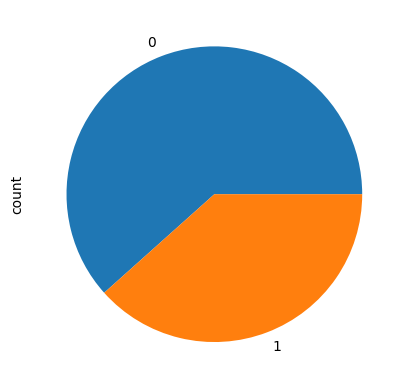

In [ ]:
y_serie.value_counts().plot(kind='pie')
y_serie.value_counts()

In [ ]:
#df.head()

In [ ]:
#y_serie.head()

,count
Pclass,
3,491
1,216
2,184


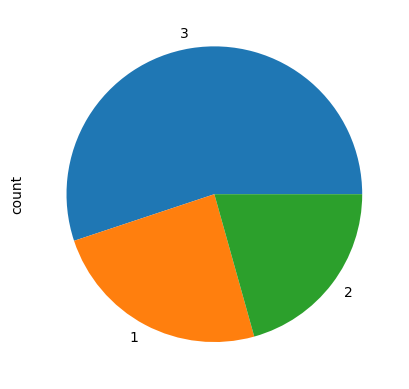

In [ ]:
df['Pclass'].value_counts().plot(kind='pie')
df['Pclass'].value_counts()

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_serie, test_size=0.2, random_state=42)
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


In [ ]:
df.shape, X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape

((891, 7), (712, 7), (179, 7), (712,), (179,))

In [ ]:
X_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,male,NaN,1,1,15.2458,C
439,2,male,31.0,0,0,10.5000,S
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C


Separate numerical and non-numerical features

In [ ]:
X_numerical_train_df = X_train_df.select_dtypes(include=[np.number])
X_numerical_test_df = X_test_df.select_dtypes(include=[np.number])

X_nonnumerical_train_df = X_train_df.select_dtypes(exclude=[np.number])
X_nonnumerical_test_df = X_test_df.select_dtypes(exclude=[np.number])


##Impute missing values for numerical features

In [ ]:
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='median')
X_numerical_train_df = numerical_imputer.fit_transform(X_numerical_train_df)

#Warining: never do fit transform on test data

###Encode categorical features:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
category_encoder = OneHotEncoder(sparse_output=False)
X_nonnumerical_train_df = category_encoder.fit_transform(X_nonnumerical_train_df)

#Feature scaling


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

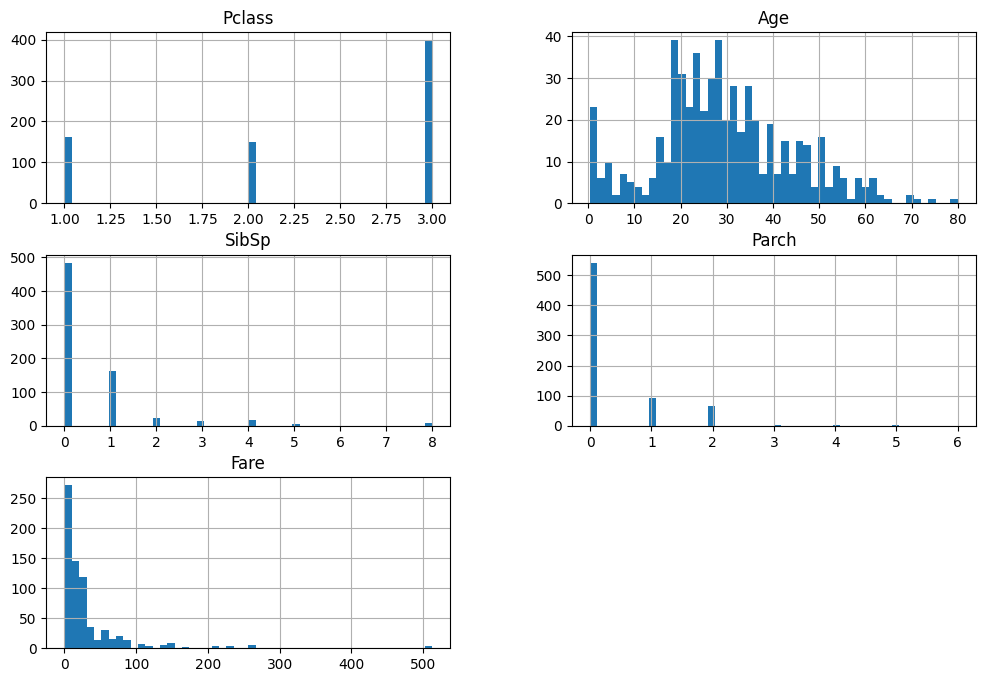

In [ ]:
X_train_df.hist(bins=50, figsize=(12,8))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1,1))

X_minmax_scaled_train = minmax_scaler.fit_transform(np.concatenate((X_numerical_train_df, X_nonnumerical_train_df), axis=1))

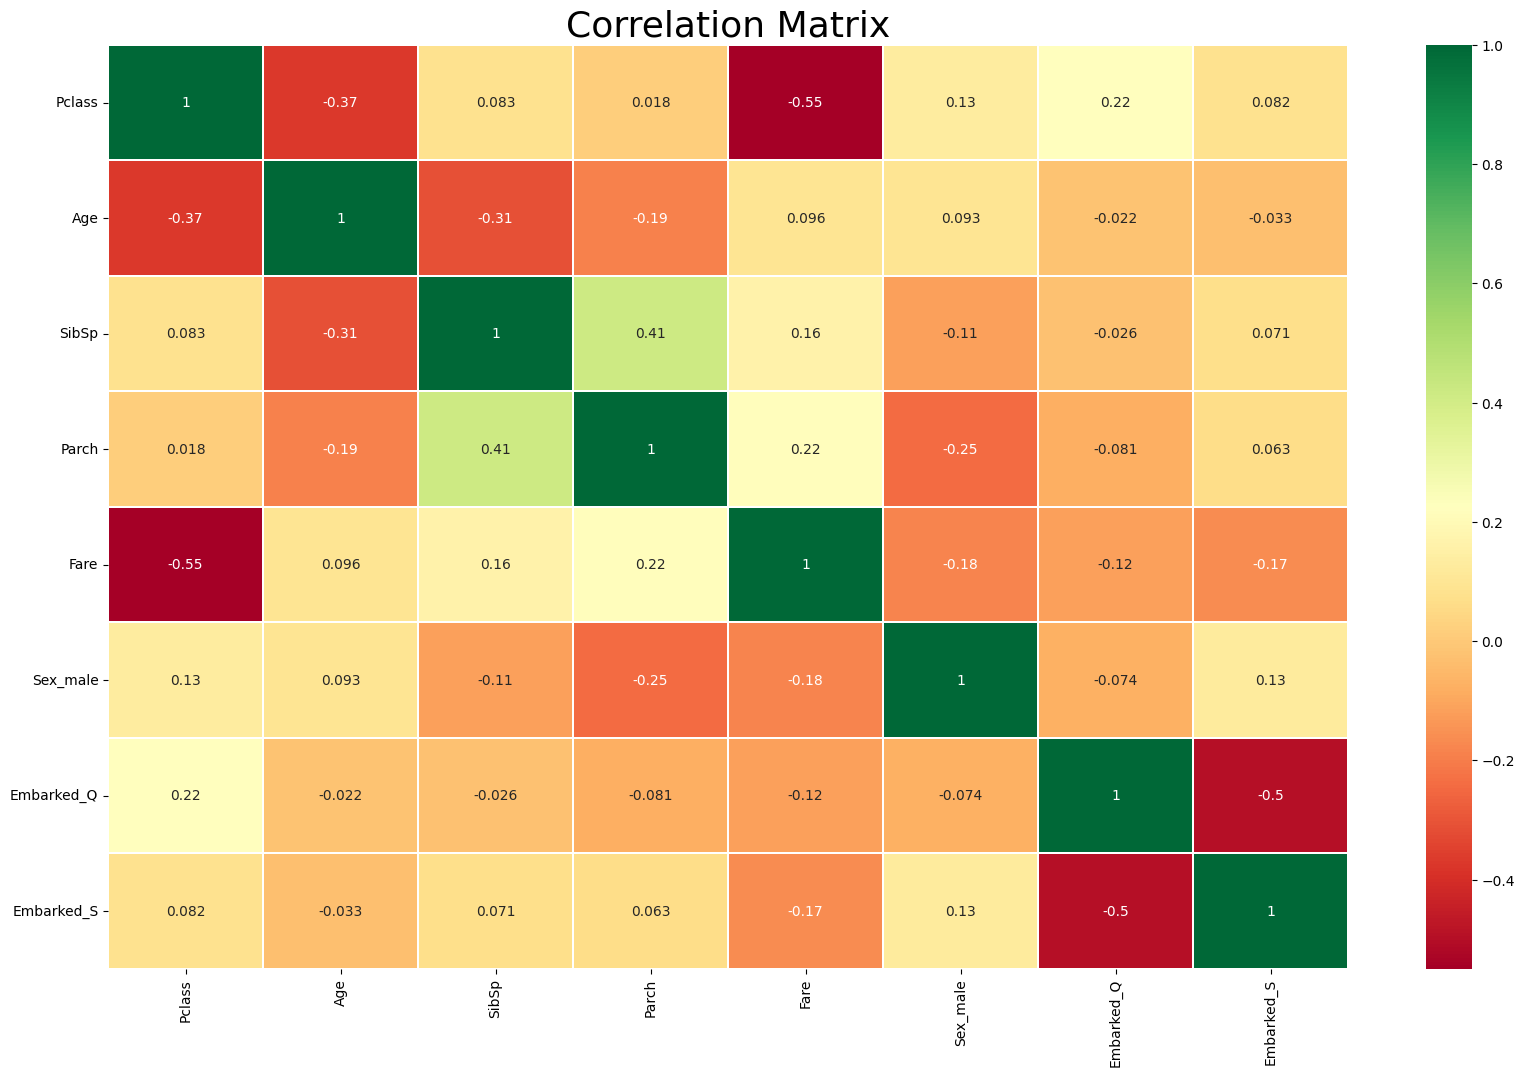

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.title('Correlation Matrix', fontsize=26)
plt.show()


#Build a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_minmax_scaled_train, y_train_df)

LinearRegression()

In [ ]:
coeff= [lr_model.rank_, lr_model.coef_, lr_model.intercept_]

#EVALUATE THE MODEL

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score

In [ ]:
X_numerical_test = numerical_imputer.transform(X_numerical_test_df)
X_nonnumerical_test = category_encoder.transform(X_nonnumerical_test_df)
X_minmax_test = minmax_scaler.transform(np.concatenate((X_numerical_test, X_nonnumerical_test), axis=1))

yhat_test_serie = lr_model.predict(X_minmax_test)

In [ ]:
y_test_df

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [ ]:
yhat_test_serie

array([ 1.22463067e-01,  2.46170937e-01,  1.43309768e-01,  8.65923596e-01,
        7.19131905e-01,  9.60633191e-01,  6.65341992e-01,  8.81511927e-02,
        7.22161806e-01,  9.36852865e-01,  3.48013765e-01,  2.97142850e-02,
        4.88572076e-01,  1.68169314e-01,  2.23378901e-01,  9.74870565e-01,
        3.24146091e-01,  6.65369962e-01,  2.65993761e-01,  3.39103722e-01,
        1.24359518e-01,  3.91670739e-01,  6.21804073e-01,  1.43768869e-01,
        1.07751883e-01,  4.28680060e-02,  4.36130904e-01,  2.47053823e-01,
        7.12779128e-02,  6.03812532e-01,  1.48034440e-01,  6.46390593e-01,
        4.94001352e-01,  6.17910056e-01,  1.52823881e-01,  1.46099020e-01,
        4.23241378e-01,  6.65341992e-01,  9.97251409e-01,  1.05419580e-01,
        2.38112970e-01,  6.15561420e-02,  1.05474037e-01,  1.52729396e-01,
        5.93129642e-01,  7.52207937e-02,  1.48127143e-01,  1.29563915e-01,
        1.24060820e-01,  3.42753983e-01,  7.06569066e-01,  7.84688510e-01,
       -5.98860343e-02,  

In [ ]:
lr_test_rmse = rmse(y_test_df, yhat_test_serie)
lr_test_rmse

0.3674775549441338

In [ ]:
yhat_train = lr_model.predict(X_minmax_scaled_train)
lr_train_rmse = rmse(y_train_df, yhat_train)
lr_train_rmse

0.3801865859442409

#####Therefore, we can see that RMSE for train and test is almost the same (varying by 0.02)

#R2 score

In [ ]:
r2_train = r2_score(y_train_df, yhat_train)
r2_train

0.3842055045394228

In [ ]:
r2_test = r2_score(y_test_df, yhat_test_serie)
r2_test

0.44313915852047603

#Logistic regression model

In [ ]:
#To use logistic regression model:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_minmax_scaled_train, y_train_df)
prediction_lr=log_reg_model.predict(X_minmax_test)

In [ ]:
coeff= [log_reg_model.coef_, log_reg_model.intercept_]
print(coeff)

[array([[-0.95093252, -1.07171905, -0.97358339, -0.3340029 ,  0.42255863,
         0.66793311, -0.66793311,  0.01984837, -0.07740209, -0.21751726,
         0.28015288]]), array([-0.66857284])]


In [ ]:
#To predict data using test data:

yhat_test_serie_log_reg = log_reg_model.predict(X_minmax_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(f'The accuracy of the Logistic Regression is {round(accuracy_score(prediction_lr ,y_test_df)*100,2)}%')


The accuracy of the Logistic Regression is 80.45%


#To evaluate the model for logistic regression:

#RMSE

In [ ]:
log_reg_model_test_rmse = rmse(y_test_df, yhat_test_serie_log_reg)
log_reg_model_test_rmse

0.4421885641408914

In [ ]:
yhat_train_log = log_reg_model.predict(X_minmax_scaled_train)
log_reg_model_train_rmse = rmse(y_train_df, yhat_train_log)
log_reg_model_train_rmse

0.4481547686114848

#R-2 score:

In [ ]:
r2_train = r2_score(y_train_df, yhat_train_log)
r2_train

0.14434583837568926

In [ ]:
r2_test = r2_score(y_test_df, yhat_test_serie_log_reg)
r2_test

0.1936936936936937

#To implement pipeline in ML models: